In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import os

from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers import Dense, Dropout, Activation, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
f_log = './log'
f_model = './model'

In [3]:
print('X_train:' + str(X_train.shape))
print('y_train:' + str(y_train.shape))
print('X_test:' + str(X_test.shape))
print('y_test:' + str(y_test.shape))

X_train:(50000, 32, 32, 3)
y_train:(50000, 1)
X_test:(10000, 32, 32, 3)
y_test:(10000, 1)


In [4]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ..., 
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ..., 
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ..., 
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ..., 
 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ..., 
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ..., 
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ..., 
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [5]:
print(X_train[0][0]) # [画像の番号][ピクセルの行or列方向指定]
print(X_train[0][0].shape)

[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]
(32, 3)


In [6]:
print(X_train[0][0][0]) #RGBの3チャンネル

[59 62 63]


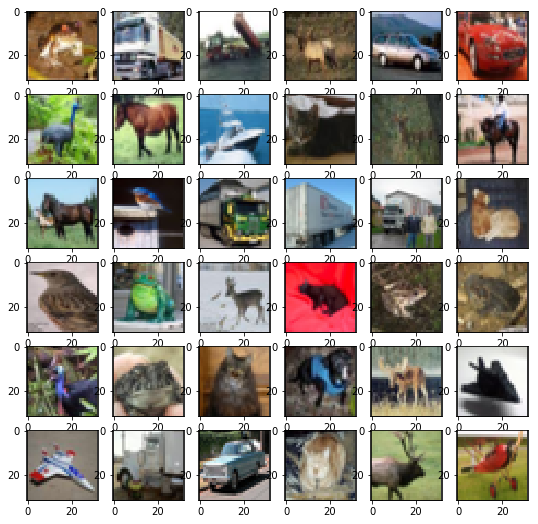

In [7]:
# show sample data(トレーニング用の画像を表示させる)
fig = plt.figure(figsize=(9,9))

for i in range(36):
    ax = fig.add_subplot(6,6, i+1, xticks=[], yticks=[]) #目盛なし
    ax = fig.add_subplot(6,6, i+1) #pixの大きさ目盛あり
    ax.imshow(X_train[i])

In [8]:
X_train = X_train.reshape([-1, 32, 32, 3]) #このデータに関してはreshapeの必要がないが、一応
X_test = X_test.reshape([-1, 32, 32, 3])

print('%i training samples' % X_train.shape[0])
print('%i test samples' % X_test.shape[0])

print(X_train.shape)
print(X_test.shape)

50000 training samples
10000 test samples
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
# 0 ~ 1に正規化
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [10]:
print(y_train[:10]) # はじめの１０個の画像ラベル

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [11]:
# one-hotベクトルに直す
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

print(type(Y_train))

<class 'numpy.ndarray'>


In [12]:
# tensorboard
import keras.callbacks
import keras.backend.tensorflow_backend as KTF
import tensorflow as tf
old_session = KTF.get_session()
session = tf.Session('')
KTF.set_session(session)

In [13]:
num_classes = 10

In [14]:
model = Sequential()


In [15]:
# CNN layer 1
model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CNN layer 2
model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# output
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [17]:
model.compile(
loss='categorical_crossentropy',
optimizer=Adam(lr=0.001),
metrics=['accuracy'])

In [18]:
tb_cb = keras.callbacks.TensorBoard(log_dir=f_log, histogram_freq=1, write_graph=True)
cp_cb = keras.callbacks.ModelCheckpoint(filepath = os.path.join(f_model,'cnn_model{epoch:02d}-loss{loss:.2f}-acc{acc:.2f}-vloss{val_loss:.2f}-vacc{val_acc:.2f}.hdf5'), monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
cbks = [tb_cb, cp_cb]

In [19]:
fit = model.fit(X_train, Y_train,
              batch_size=128,
              epochs=40, #shouldn't be raised to 100, because the overfitting occurs.
              verbose=1,
              callbacks=cbks,
              validation_split=0.1
     )

Train on 45000 samples, validate on 5000 samples
Epoch 1/40
45000/45000 [==============================] - 682s - loss: 1.6514 - acc: 0.3966 - val_loss: 1.2767 - val_acc: 0.5444
Epoch 2/40
45000/45000 [==============================] - 1347s - loss: 1.2608 - acc: 0.5482 - val_loss: 1.0733 - val_acc: 0.6246
Epoch 3/40
45000/45000 [==============================] - 628s - loss: 1.0971 - acc: 0.6127 - val_loss: 0.9008 - val_acc: 0.6874
Epoch 4/40
45000/45000 [==============================] - 1067s - loss: 0.9752 - acc: 0.6552 - val_loss: 0.8041 - val_acc: 0.7238
Epoch 5/40
45000/45000 [==============================] - 1071s - loss: 0.8801 - acc: 0.6909 - val_loss: 0.7557 - val_acc: 0.7388
Epoch 6/40
45000/45000 [==============================] - 1065s - loss: 0.8186 - acc: 0.7129 - val_loss: 0.7117 - val_acc: 0.7542
Epoch 7/40
45000/45000 [==============================] - 1055s - loss: 0.7611 - acc: 0.7334 - val_loss: 0.6967 - val_acc: 0.7612
Epoch 8/40
45000/45000 [===================

45000/45000 [==============================] - 333s - loss: 0.3399 - acc: 0.8779 - val_loss: 0.6555 - val_acc: 0.7988
Epoch 29/40
45000/45000 [==============================] - 330s - loss: 0.3293 - acc: 0.8825 - val_loss: 0.6026 - val_acc: 0.8106
Epoch 30/40
45000/45000 [==============================] - 331s - loss: 0.3268 - acc: 0.8819 - val_loss: 0.5990 - val_acc: 0.8152
Epoch 31/40
45000/45000 [==============================] - 330s - loss: 0.3153 - acc: 0.8883 - val_loss: 0.6158 - val_acc: 0.8066
Epoch 32/40
45000/45000 [==============================] - 330s - loss: 0.3156 - acc: 0.8874 - val_loss: 0.6149 - val_acc: 0.8156
Epoch 33/40
45000/45000 [==============================] - 329s - loss: 0.3129 - acc: 0.8890 - val_loss: 0.6238 - val_acc: 0.8086
Epoch 34/40
45000/45000 [==============================] - 330s - loss: 0.3027 - acc: 0.8924 - val_loss: 0.6135 - val_acc: 0.8138
Epoch 35/40
45000/45000 [==============================] - 330s - loss: 0.2947 - acc: 0.8938 - val_los

In [20]:
# 学習モデルの評価をテストデータを用いて行う
score = model.evaluate(X_test, Y_test,
                    verbose=0
                    )

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.681523697782
Test accuracy: 0.7913


In [21]:
# モデル保存
folder = 'results'
if not os.path.exists(folder):
    os.makedirs(folder)

model.save(os.path.join(folder, 'my_model.h5'))

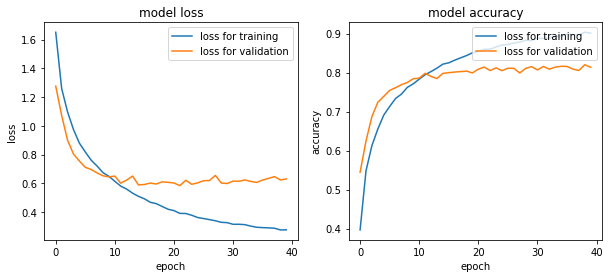

In [33]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

# loss
def plot_history_loss(fit):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit):
    # Plot the loss in the history
    axR.plot(fit.history['acc'],label="loss for training")
    axR.plot(fit.history['val_acc'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')

plot_history_loss(fit)
plot_history_acc(fit)
plt.show()
fig.savefig(os.path.join(folder, 'cifar10-tutorial.png'))
plt.close()